In [4]:
import pandas as pd
import glob

glob.glob('../data/CC*txt.gz')

['../data/CC_AVi_172-M1158-F1-F5-P13031-1-OTITOT-SumInd_TotalPeptideNorm-16plex-pat1_vs_control24_pat2_vs_control13-AR-20230418_Proteins.txt.gz',
 '../data/CCDS.current.txt.gz',
 '../data/CC_AVi_172-M1158-F1-F5-P13031-1-OTITOT-SumInd_TotalPeptideNorm-16plex-pat1pat2_vs_controls-AR-20230418_Proteins.txt.gz',
 '../data/CC_AVi_172-M1158-F1-F5-P13031-1-OTITOT-SumInd_TotalPeptideNorm-18plex-AR-20230329_Proteins.txt.gz']

In [5]:
df = pd.read_csv(
    '../data/CC_AVi_172-M1158-F1-F5-P13031-1-OTITOT-SumInd_TotalPeptideNorm-16plex-pat1_vs_control24_pat2_vs_control13-AR-20230418_Proteins.txt.gz',
    sep = '\t',
    compression = 'gzip'
)

poi_p1 = ['Q9NZI8', 'P28161', 'O00425', 'O95571', 'P09488']
suppl_p1 = df.loc[
    :,
    [
        'Accession', 
        'Gene Symbol', 
        'Abundance Ratio log2 DREAM-PL patient 1  Control groups 2 and 4', 
        'Abundance Ratio P-Value DREAM-PL patient 1  Control groups 2 and 4',
    ]
]
suppl_p1.columns = ['accession', 'symbol', 'log2FC', 'pval']
suppl_p1 = suppl_p1.loc[suppl_p1.log2FC > 0, :]
suppl_p1

/var/folders/9x/qb03zwwn1q712g85g7vs_kjc0000gn/T/ipykernel_20188/3593554537.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,accession,symbol,log2FC,pval
0,Q15149,PLEC,0.02,0.940350
4,Q14315,FLNC,0.33,0.008165
7,Q14204,DYNC1H1,0.11,0.929114
8,Q00610,CLTC,0.08,0.193645
9,P08670,VIM,0.04,0.998590
...,...,...,...,...
4718,Q96QU1,PCDH15,0.07,0.999333
4721,A6NKC0,FAM90A7,0.14,0.902617
4726,P05089,ARG1,0.21,0.850052
4729,P82650,MRPS22,0.17,0.830269


In [6]:
poi_p2 = ['Q01650', 'O00425', 'O95571', 'P08195', 'Q9Y6N5']
suppl_p2 = df.loc[
    :,
    [
        'Accession', 
        'Gene Symbol', 
        'Abundance Ratio log2 DREAM-PL patient 2  Control groups 1 and 3', 
        'Abundance Ratio P-Value DREAM-PL patient 2  Control groups 1 and 3',
    ]
]
suppl_p2.columns = ['accession', 'symbol', 'log2FC', 'pval']
suppl_p2 = suppl_p2.loc[suppl_p2.log2FC > 0, :]
suppl_p2

,accession,symbol,log2FC,pval
0,Q15149,PLEC,0.59,0.000514
3,P21333,FLNA,0.03,0.970994
4,Q14315,FLNC,0.15,0.361300
5,O75369,FLNB,0.34,0.001999
11,P13639,EEF2,0.05,0.911109
...,...,...,...,...
4694,Q99985,SEMA3C,0.53,0.285203
4705,Q9BXS6,NUSAP1,0.01,0.999789
4725,A6NEN9,CXorf65,0.05,0.999384
4729,P82650,MRPS22,0.40,0.312153


In [8]:
df = pd.read_csv(
    '../data/CC_AVi_172-M1158-F1-F5-P13031-1-OTITOT-SumInd_TotalPeptideNorm-18plex-AR-20230329_Proteins.txt.gz',
    sep = '\t',
    compression = 'gzip'
)

poi_main = ['O95571', 'O00425', 'Q9Y6N5', 'Q9NZI8', 'P42771', 'Q8IV20', 'Q8WV24']
main = df.loc[
    :,
    [
        'Accession',
        'Gene Symbol',
        'Abundance Ratio log2 DREAM PL patients  Control',
        'Abundance Ratio P-Value DREAM PL patients  Control'
    ]
]
        
main.columns = ['accession', 'symbol', 'log2FC', 'pval']
main = main.loc[main.log2FC > 0, :]
main

/var/folders/9x/qb03zwwn1q712g85g7vs_kjc0000gn/T/ipykernel_20188/44697488.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,accession,symbol,log2FC,pval
0,Q15149,PLEC,0.31,0.236125
4,Q14315,FLNC,0.25,0.019489
7,Q14204,DYNC1H1,0.03,0.985770
9,P08670,VIM,0.03,0.929486
10,P14618,PKM,0.02,0.940510
...,...,...,...,...
4721,A6NKC0,FAM90A7,0.05,0.610357
4726,P05089,ARG1,0.15,0.629936
4729,P82650,MRPS22,0.21,0.362223
4738,O15399,GRIN2D,0.09,0.748171


In [12]:
d = {
    'P1_vs_C24': suppl_p1,
    'P2_vs_C13': suppl_p2,
    'Ps_vs_Cs': main
}
pd.concat(d, axis = 1).to_csv('../../rankplot_data.csv', index = False)

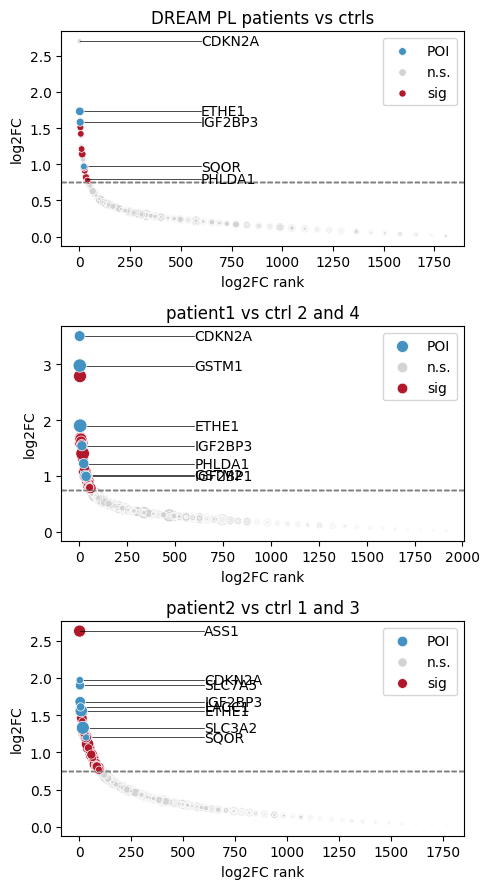

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def map_group(x, pois, lfc_cut, pval_cut):
    signif =  (abs(x.log2FC) > lfc_cut) & (x.pval < pval_cut)
    if signif and x.accession in pois:
        return 'POI'
    
    if signif:
        return 'sig'
    
    return 'n.s.'


def label_point(x, ax):
    x = poi['rank']
    y = poi['log2FC']
    ax.plot(
        [x, 600],
        [y] * 2,
        c = 'k',
        lw = 0.5
    )
    ax.text(
        600, y,
        poi['symbol'],
        va = 'center',
        ha = 'left'
    )
    

palette = {
    'sig': (178/256, 24/256, 43/256),
    'POI': (67/256, 147/256, 195/256),
    'n.s.': 'lightgrey'
}

zorders = {
    'sig': 2,
    'POI': 3,
    'n.s.': 1
}

pois = set(poi_main + poi_p1 + poi_p2)

fig, axs = plt.subplots(3)

writer = pd.ExcelWriter('../data/ranklists.xlsx')
for ax, df, title, label in zip(
    axs,
    [main, suppl_p1, suppl_p2],
    ['DREAM PL patients vs ctrls', 'patient1 vs ctrl 2 and 4', 'patient2 vs ctrl 1 and 3'],
    ['main', 'suppl_p1', 'suppl_p2']
):
    df.sort_values(by = 'log2FC', ascending = False).to_excel(
        writer,
        sheet_name = title
    )
    df['rank'] = df.log2FC.rank(ascending = False)
    df['-log10(pval)'] = -np.log10(df.pval)
    df['group'] = df.apply(
        map_group,
        axis = 1,
        pois = pois,
        lfc_cut = 0.75,
        pval_cut = 0.05
    )
    for g, gdf in df.groupby('group'):
        ax.scatter(
            x = gdf['rank'],
            y = gdf['log2FC'],
            color = palette[g],
            s = gdf['-log10(pval)'] * 15,
            zorder = zorders[g],
            label = g,
            edgecolors = 'white',
            linewidths = 0.5
        )
        if g == 'POI':
            for _, poi in gdf.iterrows():
                label_point(poi, ax)
        
        ax.axhline(
            0.75,
            ls = '--',
            c = 'grey',
            lw = 1
        )
    
    # some additional labels for completeness
    if label == 'main':
        for _, poi in df.loc[df.symbol.isin(['PHLDA1', 'CDKN2A']), :].iterrows():
            label_point(
                poi,
                ax
            )
            
    if label == 'suppl_p2':
        poi = df.loc[df.log2FC.idxmax(), :]
        label_point(
            poi,
            ax
        )
            
    ax.legend()
    ax.set_ylabel('log2FC')
    ax.set_xlabel('log2FC rank')
    ax.set_title(title)
            

writer.close()
fig.set_figwidth(5)
fig.set_figheight(9)
fig.tight_layout()
fig.savefig('../plots/rankplots.pdf')